# Importing Libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing and Data Exploration

In [94]:
data = pd.read_csv('train.tsv',delimiter="\t",quoting=3)

In [95]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Get unique values in 'Liked' Column

In [96]:
(data["Liked"]).unique()

array([1, 0])

### Get number of rows for each Liked - 0/1

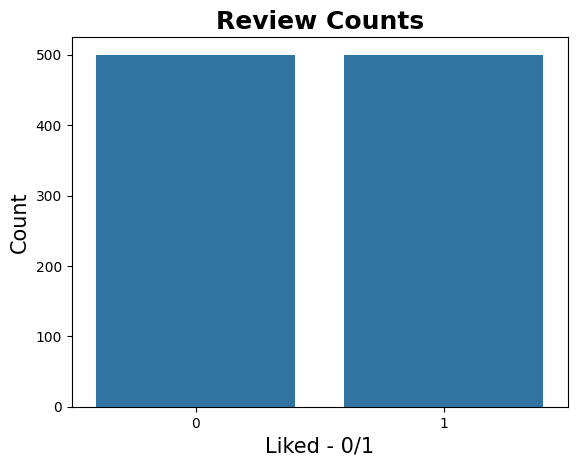

In [97]:
view = sns.countplot(x='Liked',data=data)
view.set_title('Review Counts', fontsize=18, fontweight='bold')
view.set_xlabel('Liked - 0/1', fontsize=15)
view.set_ylabel('Count', fontsize=15)
plt.show()

# Use NLTK, RE and PorterStemmer
# Get stopwords

In [98]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Get reviews after removing stopwords

In [99]:
corpus=[]

for i in range(0,data.shape[0]):
  review = re.sub('[^a-zA-Z]',' ',data["Review"][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  allStopwords = stopwords.words('english')

  # Remove not from stopwords data
  allStopwords.remove('not')

  review = [ps.stem(word) for word in review if not word in set(allStopwords)]

  review = ' '.join(review)
  corpus.append(review)


### convert each review to numerical data using CountVectorizer

In [100]:
from sklearn.feature_extraction.text import CountVectorizer

In [101]:
cv = CountVectorizer(max_features=1600)
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:,-1].values

# Train - Test Split

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Model Selection

### 1. Using RandomForestClassifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
classifier_rm = RandomForestClassifier()
classifier_rm.fit(x_train,y_train)
y_pred = classifier_rm.predict(x_test)

In [104]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [105]:
result_1 = pd.DataFrame([["RandomForestClassifier",acc,prec,rec,f1]],columns=["Model","Accuracy","Precision","Recall","F1 Score"])

In [106]:
result_1

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForestClassifier,0.755,0.875,0.61165,0.72


### 2. Using GaussianNB

In [107]:
from sklearn.naive_bayes import GaussianNB
classifier_gaussian = GaussianNB()
classifier_gaussian.fit(x_train,y_train)
y_pred = classifier_gaussian.predict(x_test)

In [108]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [109]:
result_2 = pd.DataFrame([["GaussianNB",acc,prec,rec,f1]],columns=["Model","Accuracy","Precision","Recall","F1 Score"])

In [110]:
result_2

,Model,Accuracy,Precision,Recall,F1 Score
0,GaussianNB,0.73,0.684211,0.883495,0.771186


### 3. Using KNeighborsClassifier

In [111]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(x_train,y_train)
y_pred = classifier_knn.predict(x_test)

In [112]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [113]:
result_3 = pd.DataFrame([["KNeighborsClassifier",acc,prec,rec,f1]],columns=["Model","Accuracy","Precision","Recall","F1 Score"])

In [114]:
result_3

,Model,Accuracy,Precision,Recall,F1 Score
0,KNeighborsClassifier,0.645,0.705128,0.533981,0.607735


### 4. Using AdaBoostClassifier

In [115]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ada = AdaBoostClassifier()
classifier_ada.fit(x_train,y_train)
y_pred = classifier_ada.predict(x_test)

In [116]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [117]:
result_4 = pd.DataFrame([["AdaBoostClassifier",acc,prec,rec,f1]],columns=["Model","Accuracy","Precision","Recall","F1 Score"])

In [118]:
result_4

,Model,Accuracy,Precision,Recall,F1 Score
0,AdaBoostClassifier,0.74,0.892308,0.563107,0.690476


### 5. Using MLPClassifier

In [119]:
from sklearn.neural_network import MLPClassifier
classifier_mlp = MLPClassifier()
classifier_mlp.fit(x_train,y_train)
y_pred = classifier_mlp.predict(x_test)

In [120]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [121]:
result_5 = pd.DataFrame([["MLPClassifier",acc,prec,rec,f1]],columns=["Model","Accuracy","Precision","Recall","F1 Score"])

In [122]:
result_5

,Model,Accuracy,Precision,Recall,F1 Score
0,MLPClassifier,0.795,0.803922,0.796117,0.8


### 6. Using DecisionTreeClassifier

In [123]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(x_train,y_train)
y_pred = classifier_tree.predict(x_test)

In [124]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [125]:
result_6 = pd.DataFrame([["DecisionTreeClassifier",acc,prec,rec,f1]],columns=["Model","Accuracy","Precision","Recall","F1 Score"])

In [126]:
result_6

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTreeClassifier,0.715,0.755556,0.660194,0.704663


### 7. Using LogisticRegression

In [127]:
from sklearn.linear_model import LogisticRegression
classifier_tree = LogisticRegression()
classifier_tree.fit(x_train,y_train)
y_pred = classifier_tree.predict(x_test)

In [128]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [129]:
result_7 = pd.DataFrame([["LogisticRegression",acc,prec,rec,f1]],columns=["Model","Accuracy","Precision","Recall","F1 Score"])

In [130]:
result_7

,Model,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,0.775,0.815217,0.728155,0.769231


### 8. Using SGDClassifier

In [131]:
from sklearn.linear_model import SGDClassifier
classifier_tree = SGDClassifier()
classifier_tree.fit(x_train,y_train)
y_pred = classifier_tree.predict(x_test)

In [132]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [133]:
result_8 = pd.DataFrame([["SGDClassifier",acc,prec,rec,f1]],columns=["Model","Accuracy","Precision","Recall","F1 Score"])

In [134]:
result_8

,Model,Accuracy,Precision,Recall,F1 Score
0,SGDClassifier,0.785,0.788462,0.796117,0.792271


### 9. Using GradientBoostingClassifier

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_tree = GradientBoostingClassifier()
classifier_tree.fit(x_train,y_train)
y_pred = classifier_tree.predict(x_test)

In [136]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [137]:
result_9 = pd.DataFrame([["GradientBoostingClassifier",acc,prec,rec,f1]],columns=["Model","Accuracy","Precision","Recall","F1 Score"])

In [138]:
result_9

,Model,Accuracy,Precision,Recall,F1 Score
0,GradientBoostingClassifier,0.73,0.888889,0.543689,0.674699


### Result

In [139]:
final_result = pd.concat([result_1,result_2,result_3,result_4,result_5,result_6,result_7,result_8,result_9])
final_result = final_result.reset_index(drop=True)
final_result

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForestClassifier,0.755,0.875000,0.611650,0.720000
1,GaussianNB,0.730,0.684211,0.883495,0.771186
2,KNeighborsClassifier,0.645,0.705128,0.533981,0.607735
3,AdaBoostClassifier,0.740,0.892308,0.563107,0.690476
4,MLPClassifier,0.795,0.803922,0.796117,0.800000
5,DecisionTreeClassifier,0.715,0.755556,0.660194,0.704663
6,LogisticRegression,0.775,0.815217,0.728155,0.769231
7,SGDClassifier,0.785,0.788462,0.796117,0.792271
8,GradientBoostingClassifier,0.730,0.888889,0.543689,0.674699


# Hyperparameter Tuning

In [140]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
}

randomized_search = RandomizedSearchCV(estimator=classifier_mlp,param_distributions=parameters,n_iter=5,scoring="roc_auc",cv=5,verbose=5)
randomized_search.fit(x_train,y_train)
randomized_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END activation=logistic, learning_rate=invscaling, solver=sgd;, score=0.404 total time=   0.5s
[CV 2/5] END activation=logistic, learning_rate=invscaling, solver=sgd;, score=0.400 total time=   0.6s
[CV 3/5] END activation=logistic, learning_rate=invscaling, solver=sgd;, score=0.503 total time=   0.7s
[CV 4/5] END activation=logistic, learning_rate=invscaling, solver=sgd;, score=0.603 total time=   0.6s
[CV 5/5] END activation=logistic, learning_rate=invscaling, solver=sgd;, score=0.508 total time=   1.2s
[CV 1/5] END activation=identity, learning_rate=adaptive, solver=adam;, score=0.841 total time=   7.5s
[CV 2/5] END activation=identity, learning_rate=adaptive, solver=adam;, score=0.757 total time=   5.8s
[CV 3/5] END activation=identity, learning_rate=adaptive, solver=adam;, score=0.854 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, learning_rate=adaptive, solver=adam;, score=0.827 total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, learning_rate=adaptive, solver=adam;, score=0.842 total time=   6.4s
[CV 1/5] END activation=logistic, learning_rate=invscaling, solver=lbfgs;, score=0.845 total time=   9.3s
[CV 2/5] END activation=logistic, learning_rate=invscaling, solver=lbfgs;, score=0.817 total time=   5.2s
[CV 3/5] END activation=logistic, learning_rate=invscaling, solver=lbfgs;, score=0.848 total time=   5.5s
[CV 4/5] END activation=logistic, learning_rate=invscaling, solver=lbfgs;, score=0.801 total time=   5.3s
[CV 5/5] END activation=logistic, learning_rate=invscaling, solver=lbfgs;, score=0.880 total time=   5.5s
[CV 1/5] END activation=relu, learning_rate=invscaling, solver=sgd;, score=0.535 total time=   0.9s
[CV 2/5] END activation=relu, learning_rate=invscaling, solver=sgd;, score=0.514 total time=   0.5s
[CV 3/5] END activation=relu, learning_rate=invscaling, solver=sgd;, score=0.534 total time=   0.5s
[CV 4/5] END activation=relu, learning_rate=invscaling, solver=sgd;

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, learning_rate=adaptive, solver=adam;, score=0.850 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, learning_rate=adaptive, solver=adam;, score=0.797 total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, learning_rate=adaptive, solver=adam;, score=0.868 total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, learning_rate=adaptive, solver=adam;, score=0.839 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, learning_rate=adaptive, solver=adam;, score=0.860 total time=   8.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', learning_rate='adaptive')

In [141]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(activation='logistic', learning_rate='adaptive')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [142]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [143]:
result_9 = pd.DataFrame([["Final MLPClassifier",acc,prec,rec,f1]],columns=["Model","Accuracy","Precision","Recall","F1 Score"])

In [144]:
result_9

,Model,Accuracy,Precision,Recall,F1 Score
0,Final MLPClassifier,0.81,0.809524,0.825243,0.817308


In [145]:
for i in range(10):
  print(y_test[i],y_pred[i])

0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 1


# Testing on sample Reviews

In [146]:
str = ["Food is very delicious","Food is not great","wow","Special to be here"]

temp_corpus=[]
for i in range(len(str)):
  review = re.sub('[^a-zA-Z]',' ',str[i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  allStopwords = stopwords.words('english')

  # Remove not from stopwords data
  allStopwords.remove('not')

  review = [ps.stem(word) for word in review if not word in set(allStopwords)]
  review = ' '.join(review)
  temp_corpus.append(review)


In [147]:
x_test = cv.transform(temp_corpus).toarray()
y_pred = classifier.predict(x_test)

In [148]:
result =  pd.DataFrame(columns=['Review', 'Result'])

temp_dict = []
for i in range(0,len(temp_corpus)):
    curr_row = {'Review': str[i], 'Result': y_pred[i]}
    temp_dict.append(curr_row)

result = pd.DataFrame.from_dict(temp_dict)

In [149]:
result

,Review,Result
0,Food is very delicious,1
1,Food is not great,0
2,wow,1
3,Special to be here,1
